In [2]:
from ants import regenerate_sequence_with_ants
results = {}

In [12]:
for ants_count in range(300,500,100):
    for i in range(5):
        print(f"Liczba mrówek: {ants_count}, test nr {i + 1}")
        results[(ants_count, i)] = regenerate_sequence_with_ants(7, 500, ants_count)

Liczba mrówek: 300, test nr 1
Ilosc oligo 485
Pol w macierzy 235225
Liczba mrówek: 300, test nr 2
Ilosc oligo 495
Pol w macierzy 245025
Liczba mrówek: 300, test nr 3
Ilosc oligo 485
Pol w macierzy 235225
Liczba mrówek: 300, test nr 4
Ilosc oligo 495
Pol w macierzy 245025
Liczba mrówek: 300, test nr 5
Ilosc oligo 495
Pol w macierzy 245025
Liczba mrówek: 400, test nr 1
Ilosc oligo 490
Pol w macierzy 240100
Liczba mrówek: 400, test nr 2
Ilosc oligo 493
Pol w macierzy 243049
Liczba mrówek: 400, test nr 3
Ilosc oligo 491
Pol w macierzy 241081
Liczba mrówek: 400, test nr 4
Ilosc oligo 490
Pol w macierzy 240100
Liczba mrówek: 400, test nr 5
Ilosc oligo 488
Pol w macierzy 238144


In [13]:
%store results

Stored 'results' (dict)


In [10]:
import textdistance as td 

In [14]:
for k in results:
    dist = td.levenshtein.distance(
        results[k][1][1], results[k][2])
    print(f"{k}: {dist}")

(100, 0): 234
(100, 1): 196
(100, 2): 199
(100, 3): 224
(100, 4): 195
(200, 0): 118
(200, 1): 187
(200, 2): 197
(200, 3): 208
(200, 4): 262
(300, 0): 220
(300, 1): 257
(300, 2): 221
(300, 3): 185
(300, 4): 218
(400, 0): 212
(400, 1): 219
(400, 2): 253
(400, 3): 148
(400, 4): 233


In [3]:
import pickle

with open('results.pickle', 'rb') as f:
    results = pickle.load(f)

results

{(100,
  0): (array([[494.56708288,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        , 160.73795866,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        , 223.62340939, ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]]), (0.010481997550568556,
   'GTAACAATAGTATCACAGCACAAGTAGACGCGTTTACCCGTACTCACCATGATGTTGGAGCCAATCCTCCGGAGTTCGTTGTGCCTTTTTCGGTTCTCGGGTGAGATTGCCCCAGATTCTTTTTGGGGGCGCTGGACCTCGATGGCCATGTTCCGCGGCATAAGCCGTGGGATAGTATAAGATCACTATGGGGTGATCTTTATTGCCAAAGGAGGTTGCTGCGTGGTTCAAGTTTCAGTGTAAACACTCTAGTTAGTGCAGGATTGAAGCGGTTAAGGAGTAAAT

In [15]:
import pickle

with open('results.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

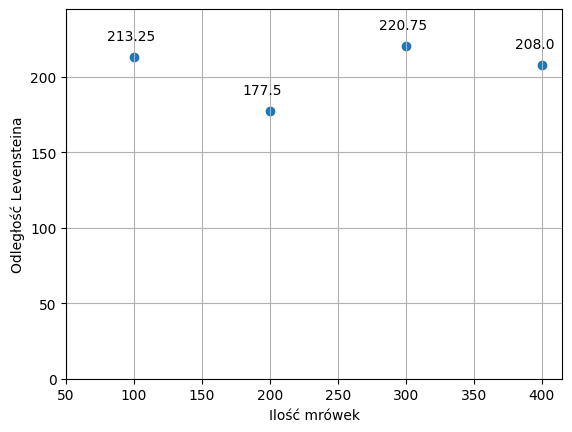

In [9]:
import math 
import matplotlib.pyplot as plt
import textdistance as td

x = [100,200,300,400]
y = []
for l in x:
    dist = 0
    for i in range(4):
        dist += td.levenshtein.distance(results[(l,i)][1][1], results[(l,i)][2])
    y.append(dist/4)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
annotate_move_y = math.floor(max(y)/20)
for i, txt in enumerate(y):
    ax.annotate(txt, (x[i] - 20, txt + annotate_move_y))
plt.grid(True)
ax.set_xlim([50, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1] + annotate_move_y * 2])
ax.set_ylabel("Odległość Levensteina")
ax.set_xlabel("Ilość mrówek")
plt.savefig("plots/8.png")